(15000, 4)
(15000,)
(500, 4)
(500,)
[[   4.       40.3467  -79.8559    0.    ]
 [   3.       33.909  -118.333     0.    ]
 [   3.       41.4455  -82.1377    2.    ]]
[0. 1. 1.]
[[   4.       40.3467  -79.8559    0.    ]
 [   3.       33.909  -118.333     0.    ]
 [   3.       41.4455  -82.1377    2.    ]]
[0. 1. 1.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                60        
_________________________________________________________________
batch_normalization_8 (Batch (None, 12)                48        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 197
Non-trainable params: 24
_______________________

/Users/som/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=4, activation="relu", kernel_initializer="uniform")`


Train on 15000 samples, validate on 500 samples
Epoch 1/30
 - 3s - loss: 0.3168 - acc: 0.7597 - val_loss: 1.7671 - val_acc: 0.5800
Epoch 2/30
 - 2s - loss: 0.3098 - acc: 0.7615 - val_loss: 1.8170 - val_acc: 0.6020
Epoch 3/30
 - 2s - loss: 0.3146 - acc: 0.7647 - val_loss: 1.8358 - val_acc: 0.6020
Epoch 4/30
 - 2s - loss: 0.3154 - acc: 0.7646 - val_loss: 1.8383 - val_acc: 0.6020
Epoch 5/30
 - 1s - loss: 0.3155 - acc: 0.7644 - val_loss: 1.8281 - val_acc: 0.6020
Epoch 6/30
 - 2s - loss: 0.3154 - acc: 0.7644 - val_loss: 1.8242 - val_acc: 0.6020
Epoch 7/30
 - 2s - loss: 0.3154 - acc: 0.7645 - val_loss: 1.8279 - val_acc: 0.6020
Epoch 8/30
 - 2s - loss: 0.3154 - acc: 0.7645 - val_loss: 1.8290 - val_acc: 0.6020
Epoch 9/30
 - 1s - loss: 0.3154 - acc: 0.7645 - val_loss: 1.8105 - val_acc: 0.6020
Epoch 10/30
 - 2s - loss: 0.3154 - acc: 0.7645 - val_loss: 1.8360 - val_acc: 0.6020
Epoch 11/30
 - 2s - loss: 0.3153 - acc: 0.7648 - val_loss: 1.8272 - val_acc: 0.6020
Epoch 12/30
 - 1s - loss: 0.3154 - ac

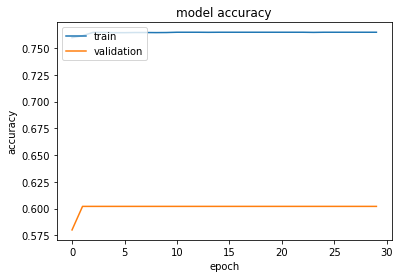

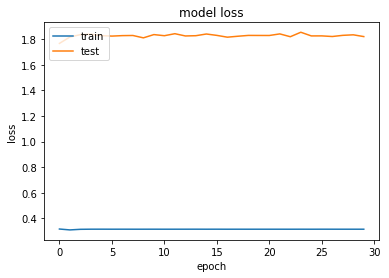

15000/15000 [==============================] - 0s 25us/step

acc: 76.48%
500/500 [==============================] - 0s 32us/step

acc: 60.20%


In [13]:
# Create first network with Keras
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load gun violence dataset
dataset = numpy.loadtxt('gviolence.csv', delimiter=',')
# split into input (X) and output (Y) variables
X = dataset[:15000,5:9]
Y = dataset[:15000,4]
XTEST = dataset[:500,5:9]
YTEST = dataset[:500,4]
print(X.shape)
print(Y.shape)
print(XTEST.shape)
print(YTEST.shape)
print(X[0:3,])
print(Y[0:3])
print(XTEST[0:3,])
print(YTEST[0:3])
# create model
model = Sequential()
model.add(Dense(12, input_dim=4, init='uniform', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X, Y, epochs=30, batch_size=20, validation_data = (XTEST, YTEST), verbose=2)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model on training dataset
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model on validation dataset
scores = model.evaluate(XTEST, YTEST)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [6]:
# calculate predictions
predictions = model.predict(XTEST)
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)
# calculate predictions
predictions = model.predict(X)
# round predictions
#rounded = [round(x[0]) for x in predictions]
print(X)

[[   4.       40.3467  -79.8559    0.    ]
 [   3.       33.909  -118.333     0.    ]
 [   3.       41.4455  -82.1377    2.    ]
 ...
 [   0.       35.5925  -87.093     0.    ]
 [   0.       26.6167  -81.7412    0.    ]
 [   2.       30.3594  -81.6831    0.    ]]
